# Linear Regression vs Linear SVM (1D) — Lab Notebook

## Overview
This notebook provides a hands-on comparison between **Linear Regression** and **Linear Support Vector Machines (SVM)** for binary classification on a 1D dataset.

### Learning Objectives:
1. Understand how linear regression can be used for classification
2. Learn about SVM decision boundaries and margins
3. Compare the two approaches and understand their differences
4. Practice implementing both methods step-by-step

### Dataset:
We'll work with 4 simple data points in 1D:
- Two points belonging to class -1
- Two points belonging to class +1

## Step 0: Import Required Libraries

We'll use three main libraries:
- **numpy**: For numerical operations and array handling
- **matplotlib**: For creating visualizations
- **sklearn.svm.SVC**: For Support Vector Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
# Set matplotlib style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')

## Step 1: Prepare the 1D Dataset

### Theoretical Background:
In binary classification, we have:
- **Input features**: $x \in \mathbb{R}$ (1D in this case)
- **Labels**: $y \in \{-1, +1\}$

Our goal is to find a decision boundary that separates the two classes.

### The Dataset:
We create 4 data points:
- **Class -1**: x = 1, 2 (left side)
- **Class +1**: x = 4, 5 (right side)

In [3]:
# Create the feature values (x-coordinates)
x = np.array([1, 2, 4, 5], dtype=float)

In [4]:
# Create the class labels (-1 or +1)
y = np.array([-1, -1, +1, +1], dtype=float)

In [5]:
# Display the dataset
print("Features (x):", x)
print("Labels (y):", y)

Features (x): [1. 2. 4. 5.]
Labels (y): [-1. -1.  1.  1.]


### Visualize the Data Points on a Number Line

Let's plot our 4 data points on a 1D number line to understand their distribution:
- **Class -1** (marked with 'x' in red): Points at x=1 and x=2
- **Class +1** (marked with 'o' in blue): Points at x=4 and x=5

This visualization helps us see the spatial separation between the two classes.

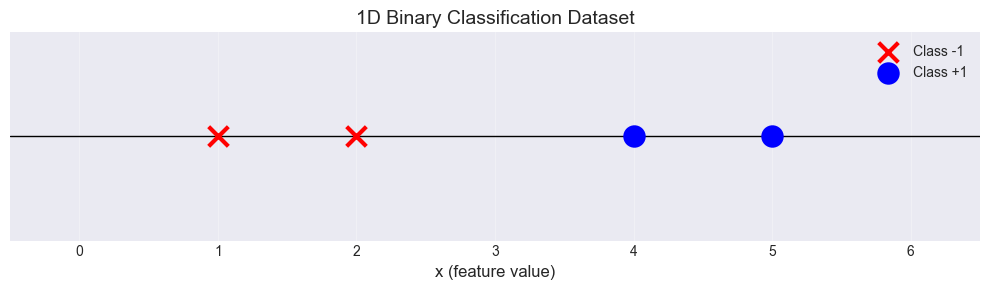

In [6]:
# Create figure for 1D visualization
fig, ax = plt.subplots(figsize=(10, 3))

# Plot class -1 points (red crosses)
ax.scatter(x[y==-1], np.zeros(2), s=200, marker='x', 
           c='red', linewidths=3, label='Class -1', zorder=3)

# Plot class +1 points (blue circles)
ax.scatter(x[y==+1], np.zeros(2), s=200, marker='o', 
           c='blue', linewidths=2, label='Class +1', zorder=3)

# Draw the number line
ax.axhline(0, color='black', linewidth=1, zorder=1)
ax.set_xlim(-0.5, 6.5)

# Add labels and formatting
ax.set_xlabel('x (feature value)', fontsize=12)
ax.set_yticks([])
ax.legend(loc='upper right')
ax.set_title('1D Binary Classification Dataset', fontsize=14)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Step 2: Linear Regression for Classification

### Theoretical Background:

**Linear Regression** tries to find a line $f(x) = wx + b$ that minimizes the **squared error**:

$$\min_{w,b} \sum_{i=1}^{n} (y_i - (wx_i + b))^2$$

For classification:
- We predict class **-1** if $f(x) < 0$
- We predict class **+1** if $f(x) > 0$
- The **decision boundary** is at $f(x) = 0$

### Why Use Linear Regression for Classification?
While not ideal (it's sensitive to outliers and doesn't maximize margin), it's a simple baseline approach.

### Fit the Linear Regression Model

We use the **least squares** method to find optimal parameters $w$ and $b$.

We solve the system: $\begin{bmatrix} x_1 & 1 \\ x_2 & 1 \\ x_3 & 1 \\ x_4 & 1 \end{bmatrix} \begin{bmatrix} w \\ b \end{bmatrix} = \begin{bmatrix} y_1 \\ y_2 \\ y_3 \\ y_4 \end{bmatrix}$

In [7]:
# Add bias column to create design matrix
X = np.c_[x, np.ones_like(x)]

In [8]:
# Solve least squares: X * params = y
params = np.linalg.lstsq(X, y, rcond=None)[0]

In [9]:
# Extract weight and bias
w_lr, b_lr = params[0], params[1]
print(f"Linear Regression Parameters:")
print(f"  w (slope) = {w_lr:.4f}")
print(f"  b (intercept) = {b_lr:.4f}")

Linear Regression Parameters:
  w (slope) = 0.6000
  b (intercept) = -1.8000


### Calculate the Decision Boundary

The decision boundary occurs where $f(x) = 0$:

$$wx + b = 0 \implies x_0 = -\frac{b}{w}$$

This $x_0$ value is where our classifier switches from predicting class -1 to class +1.

In [10]:
# Calculate decision boundary location
x0_lr = -b_lr / w_lr

In [11]:
print(f"\nLinear Regression Decision Boundary:")
print(f"  x₀ = {x0_lr:.4f}")
print(f"  Points with x < {x0_lr:.4f} are classified as -1")
print(f"  Points with x > {x0_lr:.4f} are classified as +1")


Linear Regression Decision Boundary:
  x₀ = 3.0000
  Points with x < 3.0000 are classified as -1
  Points with x > 3.0000 are classified as +1


### Visualize Linear Regression Solution

This plot shows:
1. **Blue line**: The regression line $f(x) = wx + b$
2. **Black horizontal line**: The zero line (y=0)
3. **Red vertical dashed line**: Decision boundary at $x_0$
4. **Data points**: Shown at their actual y-values (-1 or +1)

The regression line crosses y=0 at the decision boundary.

In [12]:
# Create dense points for smooth line
xx = np.linspace(0, 6, 200)
yy_lr = w_lr * xx + b_lr

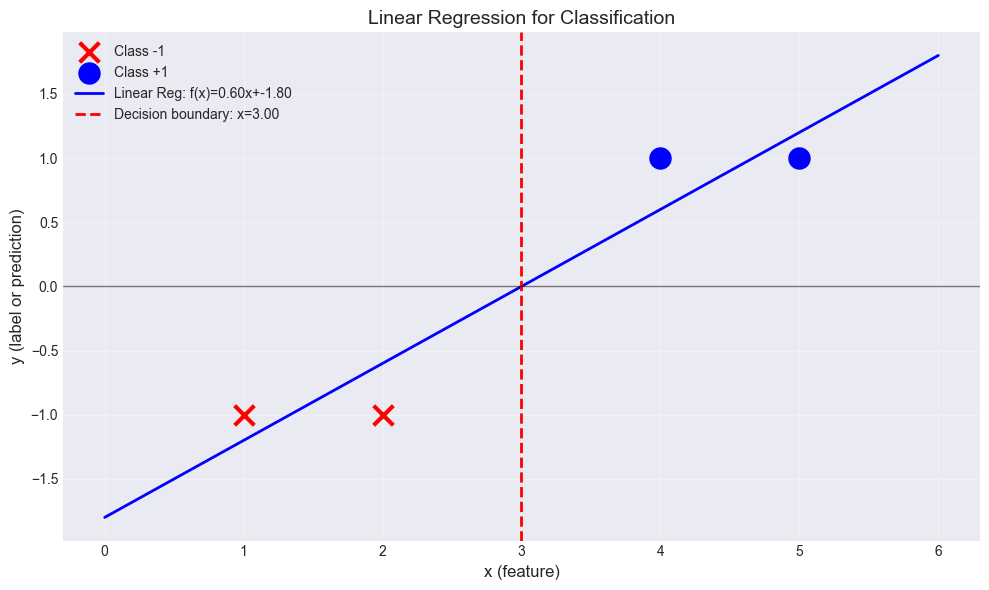

In [13]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot data points at their true y-values
ax.scatter(x[y==-1], y[y==-1], s=200, marker='x', 
           c='red', linewidths=3, label='Class -1', zorder=3)
ax.scatter(x[y==+1], y[y==+1], s=200, marker='o', 
           c='blue', linewidths=2, label='Class +1', zorder=3)

# Plot the regression line
ax.plot(xx, yy_lr, 'b-', linewidth=2, 
        label=f'Linear Reg: f(x)={w_lr:.2f}x+{b_lr:.2f}')

# Plot decision boundary (where f(x)=0)
ax.axvline(x0_lr, color='red', linestyle='--', 
           linewidth=2, label=f'Decision boundary: x={x0_lr:.2f}')

# Plot zero line
ax.axhline(0, color='black', linewidth=1, linestyle='-', alpha=0.5)

# Add labels and formatting
ax.set_xlabel('x (feature)', fontsize=12)
ax.set_ylabel('y (label or prediction)', fontsize=12)
ax.set_title('Linear Regression for Classification', fontsize=14)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Step 3: Linear Support Vector Machine (SVM)

### Theoretical Background:

**Support Vector Machine** finds a hyperplane that:
1. Correctly separates the classes
2. **Maximizes the margin** between classes

### The SVM Optimization Problem:

$$\min_{w,b} \frac{1}{2}||w||^2$$

Subject to: $y_i(wx_i + b) \geq 1$ for all $i$

### Key Concepts:
- **Decision boundary**: $wx + b = 0$
- **Margin boundaries**: $wx + b = \pm 1$
- **Support vectors**: Points that lie exactly on the margin boundaries
- **Margin width**: $\frac{2}{||w||}$

### Fit the Linear SVM Model

We use `C=1e6` (large value) to create a **hard margin** SVM.
- Large C means we penalize margin violations heavily
- This forces the SVM to find a solution with no margin violations if possible

In [14]:
# Fit Linear SVM with hard margin
svm = SVC(kernel='linear', C=1e6)
svm.fit(x.reshape(-1, 1), y)

,C,1000000.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [15]:
# Extract SVM parameters
w_svm = svm.coef_[0][0]
b_svm = svm.intercept_[0]

In [16]:
print(f"\nSVM Parameters:")
print(f"  w (slope) = {w_svm:.4f}")
print(f"  b (intercept) = {b_svm:.4f}")
print(f"  Number of support vectors: {len(svm.support_)}")
print(f"  Support vector indices: {svm.support_}")


SVM Parameters:
  w (slope) = 1.0000
  b (intercept) = -3.0000
  Number of support vectors: 2
  Support vector indices: [1 2]


### Calculate SVM Boundaries

For the SVM, we have three important boundaries:

1. **Decision boundary** (hyperplane): $wx + b = 0$
   - $x_0 = -\frac{b}{w}$

2. **Lower margin** (class -1 side): $wx + b = -1$
   - $x_- = \frac{-1-b}{w}$

3. **Upper margin** (class +1 side): $wx + b = +1$
   - $x_+ = \frac{+1-b}{w}$

The **margin width** is: $x_+ - x_- = \frac{2}{|w|}$

In [17]:
# Calculate decision boundary
x0_svm = -b_svm / w_svm

In [18]:
# Calculate margin boundaries
x_minus = (-1 - b_svm) / w_svm  # Lower margin
x_plus = (+1 - b_svm) / w_svm   # Upper margin

In [19]:
# Calculate margin width
margin_width = x_plus - x_minus

In [20]:
print(f"\nSVM Boundaries:")
print(f"  Decision boundary: x₀ = {x0_svm:.4f}")
print(f"  Lower margin (class -1): x₋ = {x_minus:.4f}")
print(f"  Upper margin (class +1): x₊ = {x_plus:.4f}")
print(f"  Margin width: {margin_width:.4f}")


SVM Boundaries:
  Decision boundary: x₀ = 3.0000
  Lower margin (class -1): x₋ = 2.0000
  Upper margin (class +1): x₊ = 4.0000
  Margin width: 2.0000


### Visualize SVM on Number Line

This visualization shows:
- **Solid green line**: Decision boundary at $x_0$
- **Dotted green lines**: Margin boundaries at $x_-$ and $x_+$
- **Shaded region**: The margin (no training points should fall inside)
- **Circled points**: Support vectors (points on the margin boundaries)

The SVM finds the widest possible margin that separates the classes.

In [21]:
# Get support vector indices
sv_idx = svm.support_

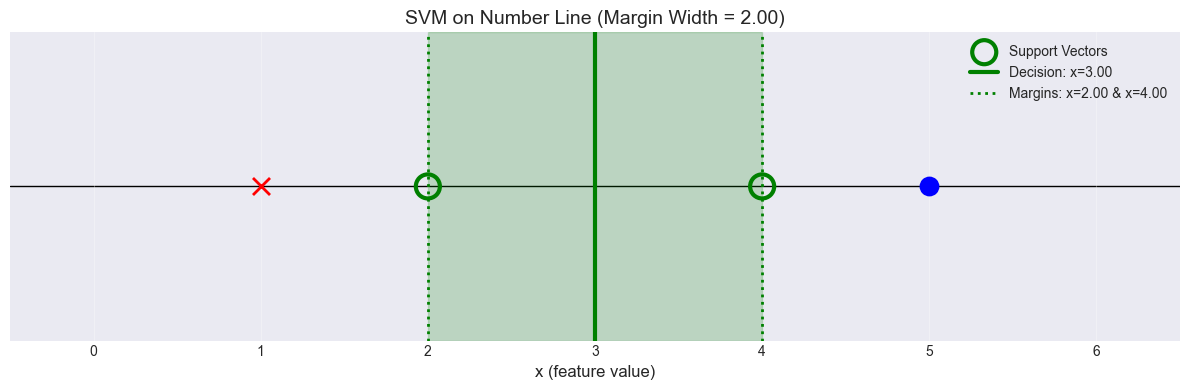

In [22]:
# Create figure
fig, ax = plt.subplots(figsize=(12, 4))

# Plot non-support vectors (smaller markers)
non_sv_mask = np.ones(len(x), dtype=bool)
non_sv_mask[sv_idx] = False

# Plot class -1 non-support vectors
mask_neg = (y == -1) & non_sv_mask
ax.scatter(x[mask_neg], np.zeros(sum(mask_neg)), s=150, marker='x',
           c='red', linewidths=2, zorder=3)

# Plot class +1 non-support vectors
mask_pos = (y == +1) & non_sv_mask
ax.scatter(x[mask_pos], np.zeros(sum(mask_pos)), s=150, marker='o',
           c='blue', linewidths=2, zorder=3)

# Plot support vectors with special highlighting
ax.scatter(x[sv_idx], np.zeros(len(sv_idx)), s=300, 
           facecolors='none', edgecolors='green', linewidths=3, 
           label='Support Vectors', zorder=4)

# Plot SVM decision boundary
ax.axvline(x0_svm, color='green', linestyle='-', 
           linewidth=3, label=f'Decision: x={x0_svm:.2f}', zorder=2)

# Plot margin boundaries
ax.axvline(x_minus, color='green', linestyle=':', 
           linewidth=2, label=f'Margins: x={x_minus:.2f} & x={x_plus:.2f}', zorder=2)
ax.axvline(x_plus, color='green', linestyle=':', linewidth=2, zorder=2)

# Shade the margin region
ax.axvspan(x_minus, x_plus, alpha=0.2, color='green', zorder=1)

# Draw number line
ax.axhline(0, color='black', linewidth=1, zorder=0)

# Format plot
ax.set_xlim(-0.5, 6.5)
ax.set_xlabel('x (feature value)', fontsize=12)
ax.set_yticks([])
ax.legend(loc='upper right')
ax.set_title(f'SVM on Number Line (Margin Width = {margin_width:.2f})', fontsize=14)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Visualize SVM Decision Function

This plot shows the decision function $f(x) = wx + b$ in 2D:

- **Blue line**: Decision function $f(x)$
- **Black line**: Zero line (decision boundary)
- **Orange dashed lines**: Margin boundaries at $f(x) = \pm 1$
- **Data points**: Plotted at their function values
- **Support vectors**: Circled - they lie exactly on $f(x) = \pm 1$

Notice how support vectors define the margin, and all other points are farther from the decision boundary.

In [23]:
# Calculate decision function values
f_svm = w_svm * xx + b_svm
f_data = w_svm * x + b_svm

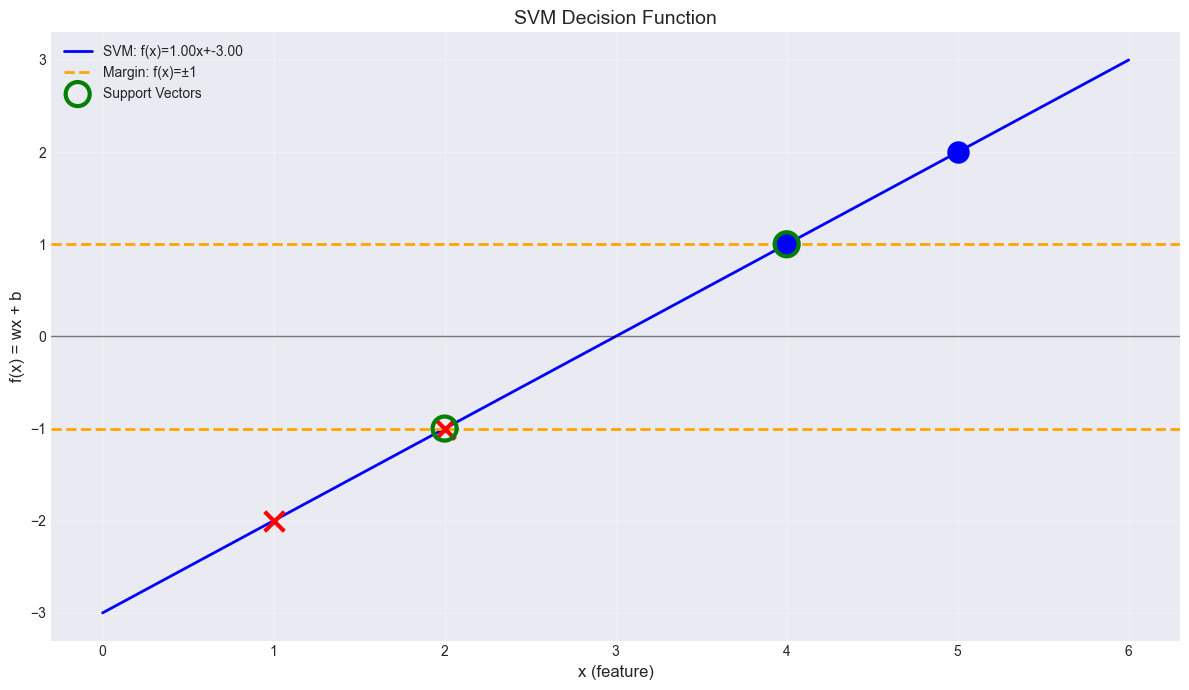

In [24]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 7))

# Plot decision function
ax.plot(xx, f_svm, 'b-', linewidth=2, 
        label=f'SVM: f(x)={w_svm:.2f}x+{b_svm:.2f}')

# Plot margin boundaries
ax.axhline(+1, color='orange', linestyle='--', 
           linewidth=2, label='Margin: f(x)=±1')
ax.axhline(-1, color='orange', linestyle='--', linewidth=2)

# Plot zero line (decision boundary)
ax.axhline(0, color='black', linewidth=1, linestyle='-', alpha=0.5)

# Plot data points at their function values
ax.scatter(x[y==-1], f_data[y==-1], s=200, marker='x',
           c='red', linewidths=3, zorder=3)
ax.scatter(x[y==+1], f_data[y==+1], s=200, marker='o',
           c='blue', linewidths=2, zorder=3)

# Highlight support vectors
ax.scatter(x[sv_idx], f_data[sv_idx], s=300, 
           facecolors='none', edgecolors='green', linewidths=3,
           label='Support Vectors', zorder=4)

# Format plot
ax.set_xlabel('x (feature)', fontsize=12)
ax.set_ylabel('f(x) = wx + b', fontsize=12)
ax.set_title('SVM Decision Function', fontsize=14)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Step 4: Compare Linear Regression vs SVM

### Key Differences:

| Aspect | Linear Regression | SVM |
|--------|------------------|-----|
| **Objective** | Minimize squared error | Maximize margin |
| **Loss Function** | $(y - f(x))^2$ | Hinge loss |
| **Decision Boundary** | Where line crosses zero | Hyperplane equidistant from classes |
| **Margin** | No explicit margin | Maximum margin between classes |
| **Outlier Sensitivity** | Very sensitive | More robust (with soft margin) |
| **Support Vectors** | Uses all points | Only uses support vectors |

### Mathematical Comparison:

**Linear Regression**:
- Minimizes: $\sum_i (y_i - (wx_i + b))^2$
- No constraints on predictions

**SVM**:
- Minimizes: $\frac{1}{2}||w||^2$
- Subject to: $y_i(wx_i + b) \geq 1$ for all $i$

In [25]:
# Print numerical comparison
print("=" * 60)
print("COMPARISON: Linear Regression vs SVM")
print("=" * 60)
print(f"\nLinear Regression:")
print(f"  Equation: f(x) = {w_lr:.4f}x + {b_lr:.4f}")
print(f"  Decision boundary: x₀ = {x0_lr:.4f}")
print(f"\nSVM:")
print(f"  Equation: f(x) = {w_svm:.4f}x + {b_svm:.4f}")
print(f"  Decision boundary: x₀ = {x0_svm:.4f}")
print(f"  Margin width: {margin_width:.4f}")
print(f"  Number of support vectors: {len(sv_idx)}")
print(f"\nDifference in decision boundaries: {abs(x0_lr - x0_svm):.4f}")
print("=" * 60)

COMPARISON: Linear Regression vs SVM

Linear Regression:
  Equation: f(x) = 0.6000x + -1.8000
  Decision boundary: x₀ = 3.0000

SVM:
  Equation: f(x) = 1.0000x + -3.0000
  Decision boundary: x₀ = 3.0000
  Margin width: 2.0000
  Number of support vectors: 2

Difference in decision boundaries: 0.0000


### Side-by-Side Comparison on Number Line

This visualization directly compares the two decision boundaries:
- **Red dashed line**: Linear Regression boundary
- **Green solid line**: SVM boundary
- **Green shaded region**: SVM margin

Notice how:
1. The boundaries are at slightly different locations
2. SVM has an explicit margin (shaded region)
3. Linear Regression has no margin concept

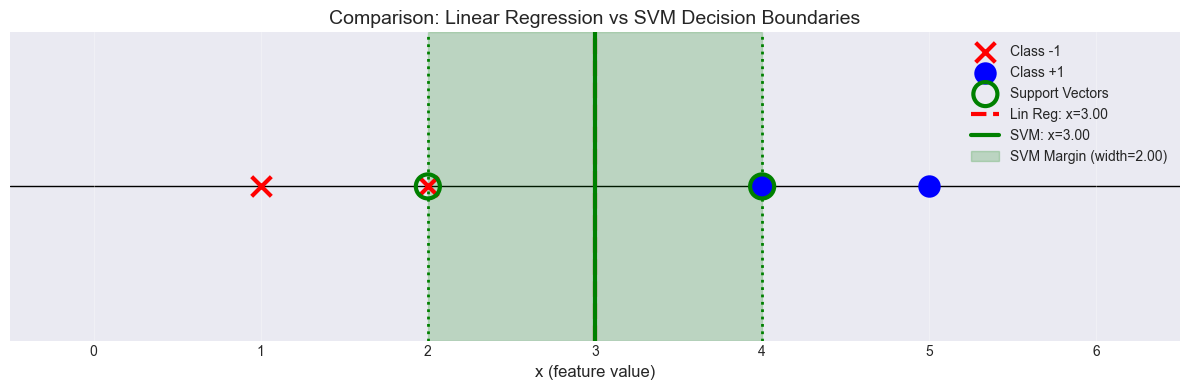

In [26]:
# Create comparison plot
fig, ax = plt.subplots(figsize=(12, 4))

# Plot data points
ax.scatter(x[y==-1], np.zeros(2), s=200, marker='x', c='red', 
           linewidths=3, label='Class -1', zorder=4)
ax.scatter(x[y==+1], np.zeros(2), s=200, marker='o', c='blue', 
           linewidths=2, label='Class +1', zorder=4)

# Highlight support vectors
ax.scatter(x[sv_idx], np.zeros(len(sv_idx)), s=300,
           facecolors='none', edgecolors='green', linewidths=3,
           label='Support Vectors', zorder=5)

# Plot Linear Regression boundary
ax.axvline(x0_lr, color='red', linestyle='--', linewidth=3,
           label=f'Lin Reg: x={x0_lr:.2f}', zorder=2)

# Plot SVM boundary and margins
ax.axvline(x0_svm, color='green', linestyle='-', linewidth=3,
           label=f'SVM: x={x0_svm:.2f}', zorder=2)
ax.axvline(x_minus, color='green', linestyle=':', linewidth=2, zorder=2)
ax.axvline(x_plus, color='green', linestyle=':', linewidth=2, zorder=2)

# Shade SVM margin
ax.axvspan(x_minus, x_plus, alpha=0.2, color='green',
           label=f'SVM Margin (width={margin_width:.2f})', zorder=1)

# Draw number line
ax.axhline(0, color='black', linewidth=1, zorder=0)
ax.set_xlim(-0.5, 6.5)

# Format plot
ax.set_xlabel('x (feature value)', fontsize=12)
ax.set_yticks([])
ax.legend(loc='upper right', fontsize=10)
ax.set_title('Comparison: Linear Regression vs SVM Decision Boundaries', fontsize=14)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Full Comparison: Functions and Boundaries

This comprehensive plot shows both methods overlaid:
- **Top panel**: Both decision functions on same axes
- **Bottom panel**: Decision boundaries on number line

Compare:
- How each method fits the data
- The different decision boundaries
- Why SVM achieves maximum margin separation

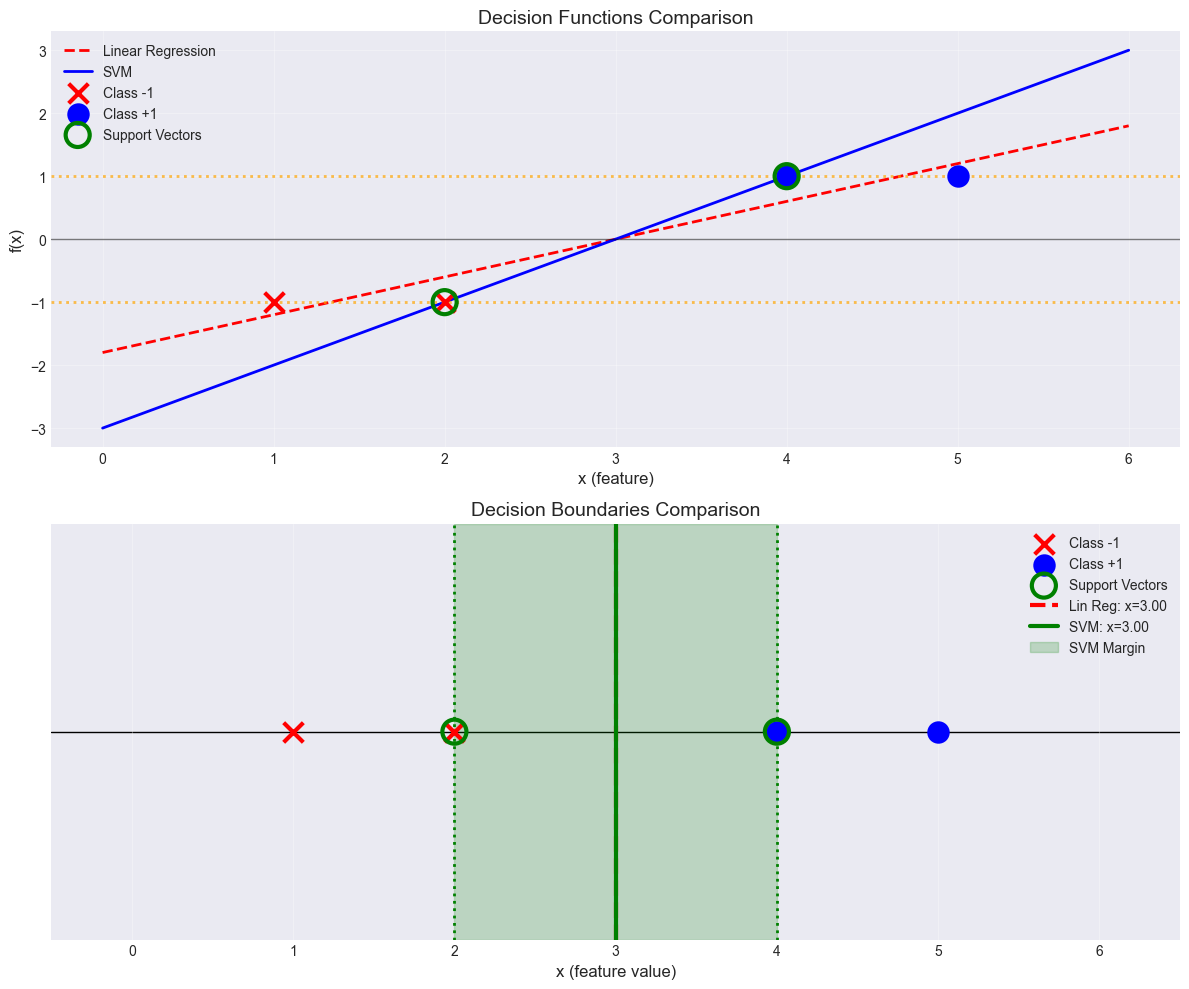

In [27]:
# Create comprehensive comparison
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# ============ Top plot: Both functions ============
# Plot both decision functions
ax1.plot(xx, yy_lr, 'r--', linewidth=2, label='Linear Regression')
ax1.plot(xx, f_svm, 'b-', linewidth=2, label='SVM')

# Plot margin boundaries for SVM
ax1.axhline(+1, color='orange', linestyle=':', linewidth=2, alpha=0.7)
ax1.axhline(-1, color='orange', linestyle=':', linewidth=2, alpha=0.7)

# Plot zero line
ax1.axhline(0, color='black', linewidth=1, linestyle='-', alpha=0.5)

# Plot data points
ax1.scatter(x[y==-1], y[y==-1], s=200, marker='x', c='red',
            linewidths=3, label='Class -1', zorder=3)
ax1.scatter(x[y==+1], y[y==+1], s=200, marker='o', c='blue',
            linewidths=2, label='Class +1', zorder=3)

# Highlight support vectors
ax1.scatter(x[sv_idx], f_data[sv_idx], s=300,
            facecolors='none', edgecolors='green', linewidths=3,
            label='Support Vectors', zorder=4)

# Format top plot
ax1.set_xlabel('x (feature)', fontsize=12)
ax1.set_ylabel('f(x)', fontsize=12)
ax1.set_title('Decision Functions Comparison', fontsize=14)
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# ============ Bottom plot: Boundaries on number line ============
# Plot data points
ax2.scatter(x[y==-1], np.zeros(2), s=200, marker='x', c='red',
            linewidths=3, label='Class -1', zorder=4)
ax2.scatter(x[y==+1], np.zeros(2), s=200, marker='o', c='blue',
            linewidths=2, label='Class +1', zorder=4)

# Highlight support vectors
ax2.scatter(x[sv_idx], np.zeros(len(sv_idx)), s=300,
            facecolors='none', edgecolors='green', linewidths=3,
            label='Support Vectors', zorder=5)

# Plot both decision boundaries
ax2.axvline(x0_lr, color='red', linestyle='--', linewidth=3,
            label=f'Lin Reg: x={x0_lr:.2f}', zorder=2)
ax2.axvline(x0_svm, color='green', linestyle='-', linewidth=3,
            label=f'SVM: x={x0_svm:.2f}', zorder=2)

# Plot SVM margins
ax2.axvline(x_minus, color='green', linestyle=':', linewidth=2, zorder=2)
ax2.axvline(x_plus, color='green', linestyle=':', linewidth=2, zorder=2)

# Shade SVM margin
ax2.axvspan(x_minus, x_plus, alpha=0.2, color='green',
            label=f'SVM Margin', zorder=1)

# Draw number line
ax2.axhline(0, color='black', linewidth=1, zorder=0)
ax2.set_xlim(-0.5, 6.5)

# Format bottom plot
ax2.set_xlabel('x (feature value)', fontsize=12)
ax2.set_yticks([])
ax2.legend(loc='upper right', fontsize=10)
ax2.set_title('Decision Boundaries Comparison', fontsize=14)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 5: Summary and Key Takeaways

### What We Learned:

1. **Linear Regression for Classification**:
   - Fits a line to minimize squared error
   - Decision boundary is where the line crosses zero
   - Simple but not optimal for classification
   - Sensitive to outliers and extreme values
   - Uses all training points equally

2. **Support Vector Machine (SVM)**:
   - Finds hyperplane that maximizes margin
   - Creates explicit safety margin between classes
   - Only depends on support vectors (points on margin)
   - More robust to outliers
   - Better generalization for classification

3. **Key Differences**:
   - **Optimization goal**: Squared error vs. maximum margin
   - **Decision boundary**: May differ significantly
   - **Margin**: No explicit margin vs. maximum margin
   - **Robustness**: Less robust vs. more robust
   - **Support vectors**: Uses all points vs. only boundary points

### When to Use Each:

**Use Linear Regression** when:
- You need a simple baseline
- Interpretability is more important than accuracy
- You're actually predicting continuous values

**Use SVM** when:
- Classification accuracy is important
- You want better generalization
- Data has clear class separation
- You need robustness to outliers

### Mathematical Insight:

The fundamental difference is the **objective function**:

**Linear Regression**: $\min \sum_i (y_i - f(x_i))^2$
- Tries to fit the data exactly
- Penalizes large errors quadratically

**SVM**: $\min \frac{1}{2}||w||^2$ subject to $y_i f(x_i) \geq 1$
- Maximizes separation between classes
- Only cares about correct classification with margin

### Further Exploration:

Try modifying the code to:
1. Add outlier points and see how each method responds
2. Change the SVM parameter `C` to create soft margins
3. Use different kernels for non-linear separation
4. Test on larger datasets with more features

---

**Congratulations!** You've successfully implemented and compared two fundamental classification approaches. This understanding forms the basis for more advanced machine learning techniques.

## Optional Exercise: Make Predictions

Try making predictions on new data points using both methods:

In [28]:
# Test point
x_test = 3.0

In [29]:
# Linear Regression prediction
pred_lr = w_lr * x_test + b_lr
class_lr = -1 if pred_lr < 0 else +1

In [30]:
# SVM prediction
pred_svm = svm.predict([[x_test]])[0]

In [31]:
print(f"\nPredictions for x = {x_test}:")
print(f"  Linear Regression: f(x) = {pred_lr:.4f}, class = {class_lr}")
print(f"  SVM: class = {pred_svm}")


Predictions for x = 3.0:
  Linear Regression: f(x) = 0.0000, class = 1
  SVM: class = 1.0
